### Imports

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.utils.class_weight import compute_class_weight

### Pre-Processing

In [11]:
df = pd.read_csv('data/aps_failure_training_set.csv')
df.dropna()
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


### Encoding

In [12]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,29,675,938,0,0,0,0,0,...,2107,25357,30850,24736,19422,7142,21198,0,0,0
1,0,33058,29,0,1886,0,0,0,0,0,...,21533,10136,13462,10717,3254,27785,23994,1737,0,0
2,0,41040,29,809,2,0,0,0,0,0,...,11705,7823,21651,22021,18547,7150,23721,6977,0,0
3,0,12,0,1809,1601,0,1,0,0,0,...,8961,24647,27510,23495,1,0,0,0,19,23
4,0,60874,29,243,1360,0,0,0,0,0,...,28485,15321,20665,18364,16724,16867,15931,824,0,0


### Split into train and test

In [13]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 48000
Test set size: 12000


### Helper Functions

In [14]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

def perform_model(X_train, y_train, X_test, y_test, model, model_name="model", sample_weight=None, verbose=True, **kwargs):
    model.set_params(**kwargs)
    model.fit(X_train, y_train, sample_weight=sample_weight)
    y_pred = model.predict(X_test)
    if verbose:
        print(f"Best parameters for {model_name}: {kwargs}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        #plot_confusion_matrix(y_test, y_pred, model_name)

def grid_search(X_train, y_train, X_test, y_test, model, params, verbose=True):
    grid = GridSearchCV(model, params, cv=5, refit=True, verbose=3)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    if verbose:
        print(f"Best parameters for {model.__class__.__name__}: {grid.best_params_}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        plot_confusion_matrix(y_test, y_pred, model.__class__.__name__)
    return grid, grid.best_params_

## TASK1

### GridSearch

In [6]:
# Dictionary to store best parameters
best_params = {}

### Support Vector Machine

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.985 total time=   9.9s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.984 total time=   9.4s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.984 total time=  13.7s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.984 total time=  21.5s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.984 total time=  15.1s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.988 total time=  18.3s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.987 total time=  16.7s
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.987 total time=  16.2s
[CV 4/5] END ................C=0.1, kernel=poly;, score=0.987 total time=  16.4s
[CV 5/5] END ................C=0.1, kernel=poly;, score=0.987 total time=  15.4s
[CV 1/5] END .............C=0.1, kernel=sigmoid;, score=0.977 total time=  11.3s
[CV 2/5] END .............C=0.1, kernel=sigmoid;

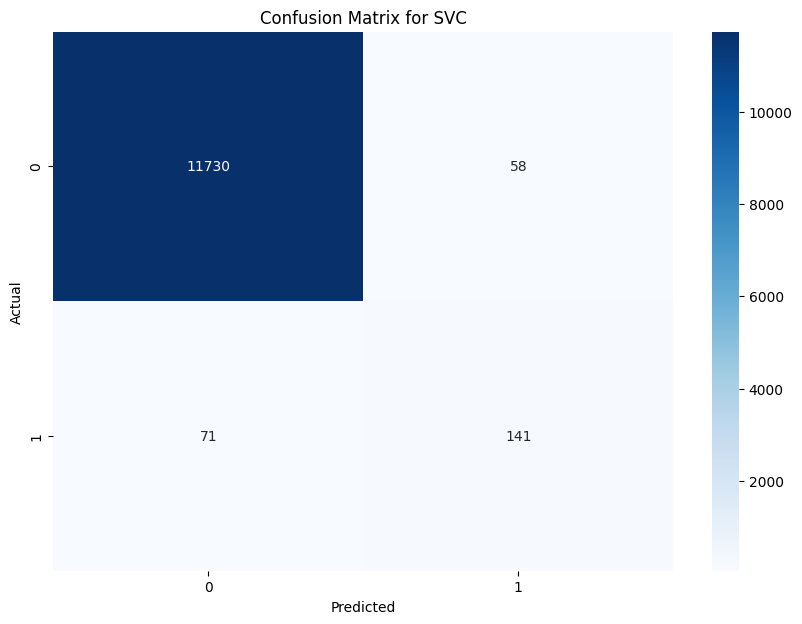

In [7]:
# SVC
svc_params = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf', 'poly', 'sigmoid']}
svc_grid, svc_best_params = grid_search(X_train, y_train, X_test, y_test, SVC(), svc_params)
best_params['SVC'] = svc_best_params

### Logistic Regression

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.988 total time=  13.3s
[CV 2/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.989 total time=  20.7s
[CV 3/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.988 total time=  17.0s
[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.988 total time=  16.0s
[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.988 total time=  13.6s


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.985 total time= 1.4min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.985 total time= 1.5min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.983 total time= 1.5min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.984 total time= 1.5min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.984 total time= 1.5min
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.987 total time= 3.6min
[CV 2/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.988 total time= 5.2min
[CV 3/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.987 total time= 3.3min
[CV 4/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.987 total time= 1.3min
[CV 5/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.987 total time= 2.0min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.985 total time= 1.1min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.985 total time= 1.1min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.983 total time= 1.1min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.984 total time= 1.1min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.984 total time= 1.1min
[CV 1/5] END .C=1, penalty=l1, solver=liblinear;, score=0.988 total time=  14.7s
[CV 2/5] END .C=1, penalty=l1, solver=liblinear;, score=0.988 total time=  20.9s
[CV 3/5] END .C=1, penalty=l1, solver=liblinear;, score=0.987 total time=  19.2s
[CV 4/5] END .C=1, penalty=l1, solver=liblinear;, score=0.988 total time=  19.3s
[CV 5/5] END .C=1, penalty=l1, solver=liblinear;, score=0.988 total time=  18.1s


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=1, penalty=l1, solver=saga;, score=0.985 total time= 1.5min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=1, penalty=l1, solver=saga;, score=0.985 total time= 1.2min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=1, penalty=l1, solver=saga;, score=0.983 total time= 1.2min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=1, penalty=l1, solver=saga;, score=0.984 total time= 1.3min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=1, penalty=l1, solver=saga;, score=0.984 total time= 1.3min
[CV 1/5] END .C=1, penalty=l2, solver=liblinear;, score=0.987 total time= 6.2min
[CV 2/5] END .C=1, penalty=l2, solver=liblinear;, score=0.988 total time= 1.5min
[CV 3/5] END .C=1, penalty=l2, solver=liblinear;, score=0.987 total time= 1.6min
[CV 4/5] END .C=1, penalty=l2, solver=liblinear;, score=0.987 total time= 2.9min
[CV 5/5] END .C=1, penalty=l2, solver=liblinear;, score=0.987 total time= 5.0min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=1, penalty=l2, solver=saga;, score=0.985 total time= 4.1min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=1, penalty=l2, solver=saga;, score=0.985 total time= 4.0min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=1, penalty=l2, solver=saga;, score=0.983 total time= 4.0min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=1, penalty=l2, solver=saga;, score=0.984 total time= 3.3min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=1, penalty=l2, solver=saga;, score=0.984 total time=  53.2s
[CV 1/5] END C=10, penalty=l1, solver=liblinear;, score=0.988 total time=  10.7s
[CV 2/5] END C=10, penalty=l1, solver=liblinear;, score=0.989 total time=  20.7s
[CV 3/5] END C=10, penalty=l1, solver=liblinear;, score=0.987 total time=  17.9s
[CV 4/5] END C=10, penalty=l1, solver=liblinear;, score=0.988 total time=  17.0s
[CV 5/5] END C=10, penalty=l1, solver=liblinear;, score=0.988 total time=  16.0s


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l1, solver=saga;, score=0.985 total time= 1.3min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, penalty=l1, solver=saga;, score=0.985 total time= 1.3min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l1, solver=saga;, score=0.983 total time= 1.3min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l1, solver=saga;, score=0.984 total time= 1.3min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=10, penalty=l1, solver=saga;, score=0.984 total time= 1.3min
[CV 1/5] END C=10, penalty=l2, solver=liblinear;, score=0.988 total time= 1.1min
[CV 2/5] END C=10, penalty=l2, solver=liblinear;, score=0.988 total time= 1.4min
[CV 3/5] END C=10, penalty=l2, solver=liblinear;, score=0.987 total time= 2.6min
[CV 4/5] END C=10, penalty=l2, solver=liblinear;, score=0.988 total time= 1.6min
[CV 5/5] END C=10, penalty=l2, solver=liblinear;, score=0.987 total time= 1.5min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l2, solver=saga;, score=0.985 total time=  58.2s


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, penalty=l2, solver=saga;, score=0.985 total time=  57.9s


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l2, solver=saga;, score=0.983 total time=  57.7s


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l2, solver=saga;, score=0.984 total time=  58.6s


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=10, penalty=l2, solver=saga;, score=0.984 total time=  57.9s
[CV 1/5] END C=100, penalty=l1, solver=liblinear;, score=0.988 total time=  11.8s
[CV 2/5] END C=100, penalty=l1, solver=liblinear;, score=0.989 total time=  19.1s
[CV 3/5] END C=100, penalty=l1, solver=liblinear;, score=0.987 total time=  16.1s
[CV 4/5] END C=100, penalty=l1, solver=liblinear;, score=0.987 total time=  16.4s
[CV 5/5] END C=100, penalty=l1, solver=liblinear;, score=0.988 total time=  14.0s


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l1, solver=saga;, score=0.985 total time= 1.3min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l1, solver=saga;, score=0.985 total time= 1.3min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l1, solver=saga;, score=0.983 total time= 1.3min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l1, solver=saga;, score=0.984 total time= 1.3min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=100, penalty=l1, solver=saga;, score=0.984 total time= 1.3min
[CV 1/5] END C=100, penalty=l2, solver=liblinear;, score=0.987 total time= 2.8min
[CV 2/5] END C=100, penalty=l2, solver=liblinear;, score=0.988 total time= 4.3min
[CV 3/5] END C=100, penalty=l2, solver=liblinear;, score=0.987 total time= 1.1min
[CV 4/5] END C=100, penalty=l2, solver=liblinear;, score=0.988 total time= 1.5min
[CV 5/5] END C=100, penalty=l2, solver=liblinear;, score=0.987 total time= 3.1min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l2, solver=saga;, score=0.985 total time=  58.4s


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l2, solver=saga;, score=0.985 total time=  58.4s


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l2, solver=saga;, score=0.983 total time=  57.7s


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l2, solver=saga;, score=0.984 total time=  57.6s


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=100, penalty=l2, solver=saga;, score=0.984 total time=  57.3s
[CV 1/5] END C=1000, penalty=l1, solver=liblinear;, score=0.988 total time=  13.1s
[CV 2/5] END C=1000, penalty=l1, solver=liblinear;, score=0.989 total time=  19.1s
[CV 3/5] END C=1000, penalty=l1, solver=liblinear;, score=0.987 total time=  16.3s
[CV 4/5] END C=1000, penalty=l1, solver=liblinear;, score=0.987 total time=  16.3s
[CV 5/5] END C=1000, penalty=l1, solver=liblinear;, score=0.988 total time=  15.1s


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=1000, penalty=l1, solver=saga;, score=0.985 total time= 1.3min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=1000, penalty=l1, solver=saga;, score=0.985 total time= 1.3min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=1000, penalty=l1, solver=saga;, score=0.983 total time= 1.3min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=1000, penalty=l1, solver=saga;, score=0.984 total time= 1.3min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=1000, penalty=l1, solver=saga;, score=0.984 total time= 1.3min
[CV 1/5] END C=1000, penalty=l2, solver=liblinear;, score=0.988 total time= 1.3min
[CV 2/5] END C=1000, penalty=l2, solver=liblinear;, score=0.988 total time= 1.6min
[CV 3/5] END C=1000, penalty=l2, solver=liblinear;, score=0.987 total time= 1.5min
[CV 4/5] END C=1000, penalty=l2, solver=liblinear;, score=0.987 total time= 1.2min
[CV 5/5] END C=1000, penalty=l2, solver=liblinear;, score=0.987 total time= 3.2min


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=1000, penalty=l2, solver=saga;, score=0.985 total time=  57.5s


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=1000, penalty=l2, solver=saga;, score=0.985 total time=  58.3s


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=1000, penalty=l2, solver=saga;, score=0.983 total time=  57.4s


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=1000, penalty=l2, solver=saga;, score=0.984 total time=  58.3s


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=1000, penalty=l2, solver=saga;, score=0.984 total time=  58.7s
Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
[[11741    47]
 [  119    93]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11788
           1       0.66      0.44      0.53       212

    accuracy                           0.99     12000
   macro avg       0.83      0.72      0.76     12000
weighted avg       0.98      0.99      0.98     12000



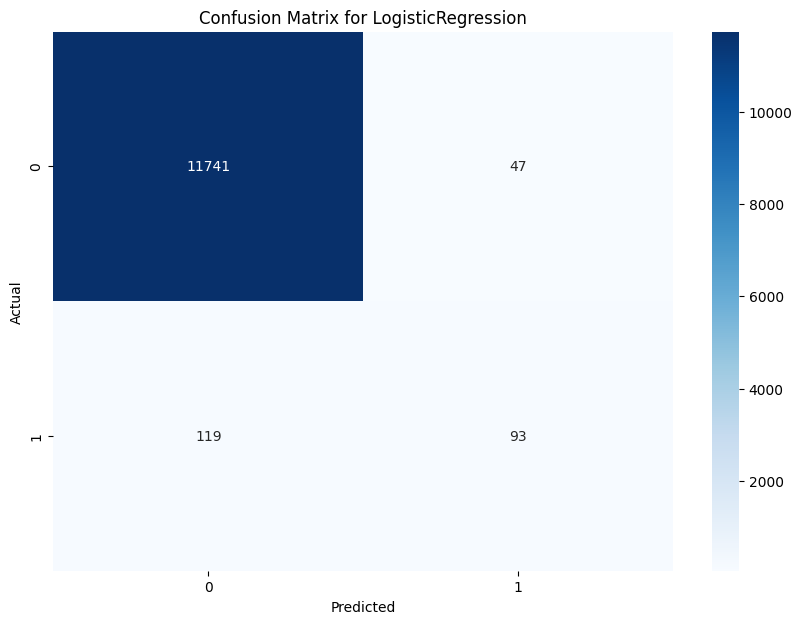

In [8]:
# Logistic Regression
logreg_params = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
logreg_grid, logreg_best_params = grid_search(X_train, y_train, X_test, y_test, LogisticRegression(max_iter=1000), logreg_params)
best_params['LogisticRegression'] = logreg_best_params

### Decision Trees

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...max_depth=3, min_samples_leaf=1;, score=0.987 total time=   1.1s
[CV 2/5] END ...max_depth=3, min_samples_leaf=1;, score=0.986 total time=   1.0s
[CV 3/5] END ...max_depth=3, min_samples_leaf=1;, score=0.987 total time=   1.1s
[CV 4/5] END ...max_depth=3, min_samples_leaf=1;, score=0.986 total time=   1.1s
[CV 5/5] END ...max_depth=3, min_samples_leaf=1;, score=0.986 total time=   1.0s
[CV 1/5] END ...max_depth=3, min_samples_leaf=2;, score=0.987 total time=   1.0s
[CV 2/5] END ...max_depth=3, min_samples_leaf=2;, score=0.986 total time=   1.0s
[CV 3/5] END ...max_depth=3, min_samples_leaf=2;, score=0.987 total time=   1.1s
[CV 4/5] END ...max_depth=3, min_samples_leaf=2;, score=0.986 total time=   1.0s
[CV 5/5] END ...max_depth=3, min_samples_leaf=2;, score=0.986 total time=   1.0s
[CV 1/5] END ...max_depth=3, min_samples_leaf=3;, score=0.987 total time=   1.0s
[CV 2/5] END ...max_depth=3, min_samples_leaf=3

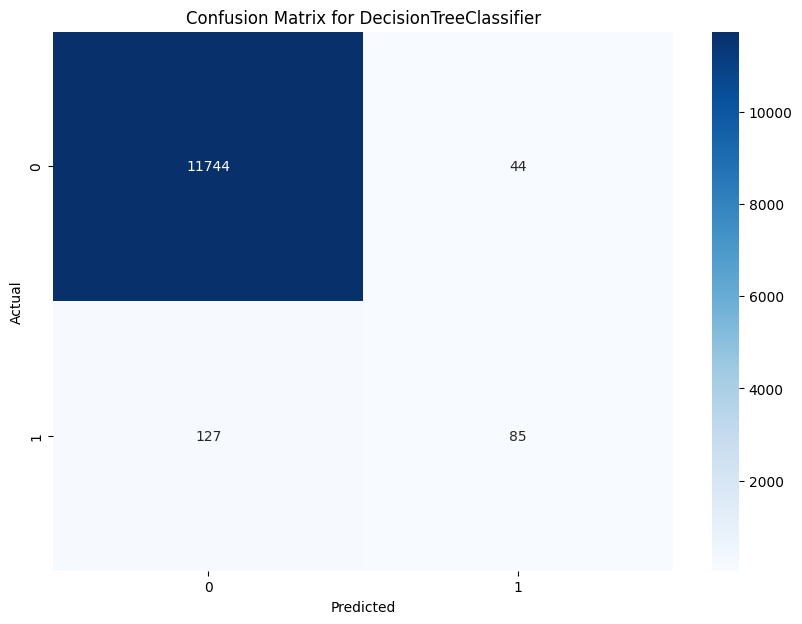

In [9]:
# Decision Tree
dt_params = {'max_depth': [3, 5, 7, 9, 11], 'min_samples_leaf': [1, 2, 3, 4, 5]}
dt_grid, dt_best_params = grid_search(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), dt_params)
best_params['DecisionTree'] = dt_best_params

### Best Parameters

In [16]:
# Print best parameters for each model
print("Best parameters for each model:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")

Best parameters for each model:
SVC: {'C': 100, 'kernel': 'rbf'}
LogisticRegression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
DecisionTree: {'max_depth': 7, 'min_samples_leaf': 1}


### Best Params results

In [15]:
best_params = {
    'SVC': {'C': 100, 'kernel': 'rbf'},
    'LogisticRegression': {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'},
    'DecisionTree': {'max_depth': 7, 'min_samples_leaf': 1}
}

## TASK 2

### Sampling

#### Random over sampler

label
0    59000
1    59000
Name: count, dtype: int64


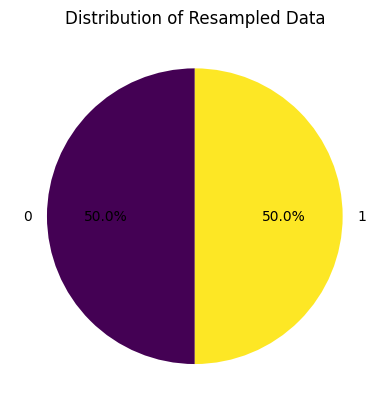

In [8]:
# Apply Random Oversampling to the entire dataset
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)


# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

# Combine the Resampled Data into a DataFrame for checking distribution
df_oversampled = pd.DataFrame(X_oversampled, columns=[f'feature_{i}' for i in range(X_oversampled.shape[1])])
df_oversampled['label'] = y_oversampled

# Check the distribution of the new dataset
print(df_oversampled['label'].value_counts())

# Plot a pie chart of the distribution
df_oversampled['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.ylabel('')
plt.title('Distribution of Resampled Data')
plt.show()

In [9]:
# Perform SVC
perform_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, SVC(), model_name="SVC", verbose=True, **best_params['SVC'])

# Perform Logistic Regression
perform_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, LogisticRegression(max_iter=1000), model_name="Logistic Regression", verbose=True, **best_params['LogisticRegression'])

# Perform Decision Tree
perform_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, DecisionTreeClassifier(), model_name="Decision Tree", verbose=True, **best_params['DecisionTree'])

Best parameters for SVC: {'C': 100, 'kernel': 'rbf'}
[[11724   228]
 [    8 11640]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11952
           1       0.98      1.00      0.99     11648

    accuracy                           0.99     23600
   macro avg       0.99      0.99      0.99     23600
weighted avg       0.99      0.99      0.99     23600

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
[[11425   527]
 [  424 11224]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11952
           1       0.96      0.96      0.96     11648

    accuracy                           0.96     23600
   macro avg       0.96      0.96      0.96     23600
weighted avg       0.96      0.96      0.96     23600

Best parameters for Decision Tree: {'max_depth': 7, 'min_samples_leaf': 1}
[[11580   372]
 [  230 11418]]
              precision    recall

### Random under Sampler

label
0    1000
1    1000
Name: count, dtype: int64


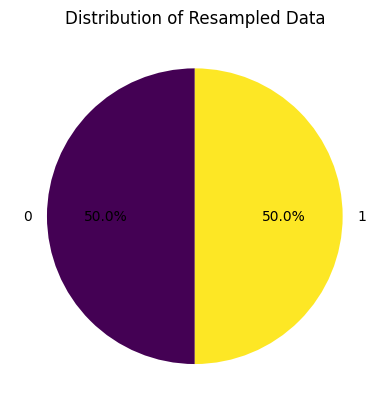

In [10]:
# Apply Random Undersampling to the oversampled dataset
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)

# Combine the Resampled Data into a DataFrame for checking distribution
df_undersampled = pd.DataFrame(X_undersampled, columns=[f'feature_{i}' for i in range(X_undersampled.shape[1])])
df_undersampled['label'] = y_undersampled

# Check the distribution of the new dataset
print(df_undersampled['label'].value_counts())

# Plot a pie chart of the distribution
df_undersampled['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.ylabel('')
plt.title('Distribution of Resampled Data')
plt.show()

In [11]:
# Perform SVC
perform_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, SVC(), model_name="SVC", verbose=True, **best_params['SVC'])

# Perform Logistic Regression
perform_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, LogisticRegression(max_iter=1000), model_name="Logistic Regression", verbose=True, **best_params['LogisticRegression'])

# Perform Decision Tree
perform_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, DecisionTreeClassifier(), model_name="Decision Tree", verbose=True, **best_params['DecisionTree'])

Best parameters for SVC: {'C': 100, 'kernel': 'rbf'}
[[185  14]
 [ 11 190]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       199
           1       0.93      0.95      0.94       201

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
[[181  18]
 [ 14 187]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       199
           1       0.91      0.93      0.92       201

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400

Best parameters for Decision Tree: {'max_depth': 7, 'min_samples_leaf': 1}
[[188  11]
 [ 16 185]]
              precision    recall  f1-score   support

  

#### SMOTEENN

label
1    58998
0    56127
Name: count, dtype: int64


C:\Users\anike\AppData\Local\Temp\ipykernel_12568\1917121972.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['label'] = y_resampled


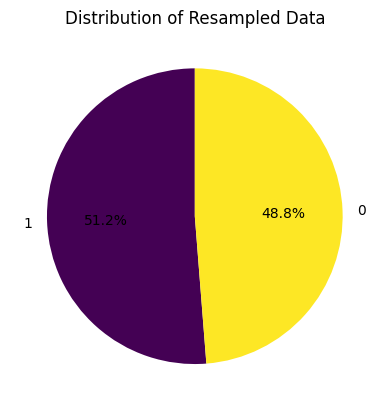

In [12]:
# Apply SMOTEENN to the entire dataset
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Combine the Resampled Data into a DataFrame for checking distribution
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['label'] = y_resampled

# Check the distribution of the new dataset
print(df_resampled['label'].value_counts())

# Plot a pie chart of the distribution
df_resampled['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.ylabel('')
plt.title('Distribution of Resampled Data')
plt.show()

In [13]:
# Perform SVC
perform_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, SVC(), model_name="SVC", verbose=True, **best_params['SVC'])

# Perform Logistic Regression
perform_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, LogisticRegression(max_iter=1000), model_name="Logistic Regression", verbose=True, **best_params['LogisticRegression'])

# Perform Decision Tree
perform_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, DecisionTreeClassifier(), model_name="Decision Tree", verbose=True, **best_params['DecisionTree'])

Best parameters for SVC: {'C': 100, 'kernel': 'rbf'}
[[11252    63]
 [    2 11708]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     11315
           1       0.99      1.00      1.00     11710

    accuracy                           1.00     23025
   macro avg       1.00      1.00      1.00     23025
weighted avg       1.00      1.00      1.00     23025

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
[[11052   263]
 [  241 11469]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11315
           1       0.98      0.98      0.98     11710

    accuracy                           0.98     23025
   macro avg       0.98      0.98      0.98     23025
weighted avg       0.98      0.98      0.98     23025

Best parameters for Decision Tree: {'max_depth': 7, 'min_samples_leaf': 1}
[[11129   186]
 [   70 11640]]
              precision    recall

### Weights

#### Class weights

In [14]:
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Dictionary to store best parameters
best_params['SVC']['class_weight'] = class_weight_dict
best_params['LogisticRegression']['class_weight'] = class_weight_dict
best_params['DecisionTree']['class_weight'] = class_weight_dict

# Perform SVC
perform_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, SVC(), 'SVC', verbose=True, **best_params['SVC'])

# Perform Logistic Regression
perform_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, LogisticRegression(max_iter=1000), 'Logistic Regression', verbose=True, **best_params['LogisticRegression'])

# Perform Decision Tree
perform_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, DecisionTreeClassifier(), 'Decision Tree', verbose=True, **best_params['DecisionTree'])

Best parameters for SVC: {'C': 100, 'kernel': 'rbf', 'class_weight': {0: 0.5083453359315429, 1: 30.456852791878173}}
[[11181   134]
 [    0 11710]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11315
           1       0.99      1.00      0.99     11710

    accuracy                           0.99     23025
   macro avg       0.99      0.99      0.99     23025
weighted avg       0.99      0.99      0.99     23025

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear', 'class_weight': {0: 0.5083453359315429, 1: 30.456852791878173}}
[[ 9978  1337]
 [    0 11710]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     11315
           1       0.90      1.00      0.95     11710

    accuracy                           0.94     23025
   macro avg       0.95      0.94      0.94     23025
weighted avg       0.95      0.94      0.94     23025

Best parame

#### Sample weights

In [15]:
# Compute sample weights
sample_weight = np.array([class_weight_dict[cls] for cls in y_train])

# Perform SVC
perform_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, SVC(), 'SVC', verbose=True, **best_params['SVC'])

# Perform Logistic Regression
perform_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, LogisticRegression(max_iter=1000), 'Logistic Regression', verbose=True, **best_params['LogisticRegression'])

# Perform Decision Tree
perform_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, DecisionTreeClassifier(), 'Decision Tree', verbose=True, **best_params['DecisionTree'])

Best parameters for SVC: {'C': 100, 'kernel': 'rbf', 'class_weight': {0: 0.5083453359315429, 1: 30.456852791878173}}
[[11181   134]
 [    0 11710]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11315
           1       0.99      1.00      0.99     11710

    accuracy                           0.99     23025
   macro avg       0.99      0.99      0.99     23025
weighted avg       0.99      0.99      0.99     23025

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear', 'class_weight': {0: 0.5083453359315429, 1: 30.456852791878173}}
[[ 9944  1371]
 [    0 11710]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     11315
           1       0.90      1.00      0.94     11710

    accuracy                           0.94     23025
   macro avg       0.95      0.94      0.94     23025
weighted avg       0.95      0.94      0.94     23025

Best parame

### Idiot zone

In [17]:
# Apply Random Oversampling to the entire dataset
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

# Apply Random Undersampling to the oversampled dataset
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_oversampled, y_oversampled)

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize ensemble classifiers
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
eec = EasyEnsembleClassifier(n_estimators=100, random_state=42)

# Train and evaluate Balanced Random Forest
brf.fit(X_train_resampled, y_train_resampled)
y_pred_brf = brf.predict(X_test_resampled)
print("Balanced Random Forest Confusion Matrix:")
print(confusion_matrix(y_test_resampled, y_pred_brf))
print("\nBalanced Random Forest Classification Report:")
print(classification_report(y_test_resampled, y_pred_brf))

# Train and evaluate Easy Ensemble Classifier
eec.fit(X_train_resampled, y_train_resampled)
y_pred_eec = eec.predict(X_test_resampled)
print("Easy Ensemble Classifier Confusion Matrix:")
print(confusion_matrix(y_test_resampled, y_pred_eec))
print("\nEasy Ensemble Classifier Classification Report:")
print(classification_report(y_test_resampled, y_pred_eec))

c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set

Balanced Random Forest Confusion Matrix:
[[11900    48]
 [    0 11652]]

Balanced Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11948
           1       1.00      1.00      1.00     11652

    accuracy                           1.00     23600
   macro avg       1.00      1.00      1.00     23600
weighted avg       1.00      1.00      1.00     23600



KeyboardInterrupt: 